In [5]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import time
# courtesy of Jeff Phillips @ http://www.cs.utah.edu/~jeffp/DMBook/L2-StatisticalPrinciples.pdf 

# The aim of the Coupon Collection is to measure the expected triials to obtain all distinct possibilities

Lets now formalize the famous coupon lottery. There are n types of coupons, and we participate in a series of independent trials, and on each trial we have equal probability (1/n) of getting each coupon. We want to collect all toys available in a McDonald’s Happy Meal. How many trials (k) should we expect to partake in before we collect all coupons?

Let ri be the expected number of trials we need to take before receiving exactly i distinct coupons. Let $r_0$ = 0, and set $t_i = r_i − r_i−1$ to measure the expected number of trials between getting i − 1 distinct coupons and i distinct coupons.

Clearly, $r_1 = t_1 = 1$, and it has no variance. Our first trials always yields a new coupon.
Then the expected number of trials to get all coupons is $T = \sum^n_{i=1} t_i$.

To measure $t_i$ we will define $p_i$ as the probability that we get a new coupon after already having i − 1
distinct coupons. Thus $t_i = 1/p_i$. And $p_i = (n − i + 1)/n$.

$T = \sum^n_{i=1}t_i = \sum^n_{i=1}\frac{n}{n-i+1} = n\sum^n_{i=1}\frac{1}{i}$

Now we just need to bound the quantity  $\sum^n_{i=1}\frac{1}{i}$. This is known at the nth Harmonic Number $H_n$. It is known that $H_n =γ+\ln{n}+o(1/n)$ where ln(·) is the natural log (that is ln e =1) and γ ≈ 0.577 is the Euler-Masheroni constant.

#### Thus we need, in expectation,

$k = T = nH_n ≈ n(\gamma + \ln {n})$

In [21]:
def coupon(buckets):
    visited = set()
    trials = 0
    while True:
        nextRan = random.randint(1,buckets)
        trials += 1
        if nextRan not in visited:
            visited.add(nextRan)
            if len(visited) == buckets:
                return trials
    return trials
     # We add one because the collision doesn't reflect on the size of the set

In [22]:
n = 365
print('%d trials to get every possibility'%coupon(n))
### expected
print('when the expected amount of trials to cover all posibilities is %d'%((math.log(n) + 0.5772)*n)) #euler-Mascheroni constant

2159 trials to get every possibility
when the expected amount of trials to cover all posibilities is 2364


Let's perform 300 random trials and plot out the rate of success with varying values of K

In [23]:
y = []
k = []
trials = 300
totalFrac = 1/trials
while trials > 0:
    nextRand = coupon(n)
    k.append(nextRand)
    trials -= 1
k = sorted(k)
for z in range(len(k)):
    y.append(k.index(k[z])*totalFrac)

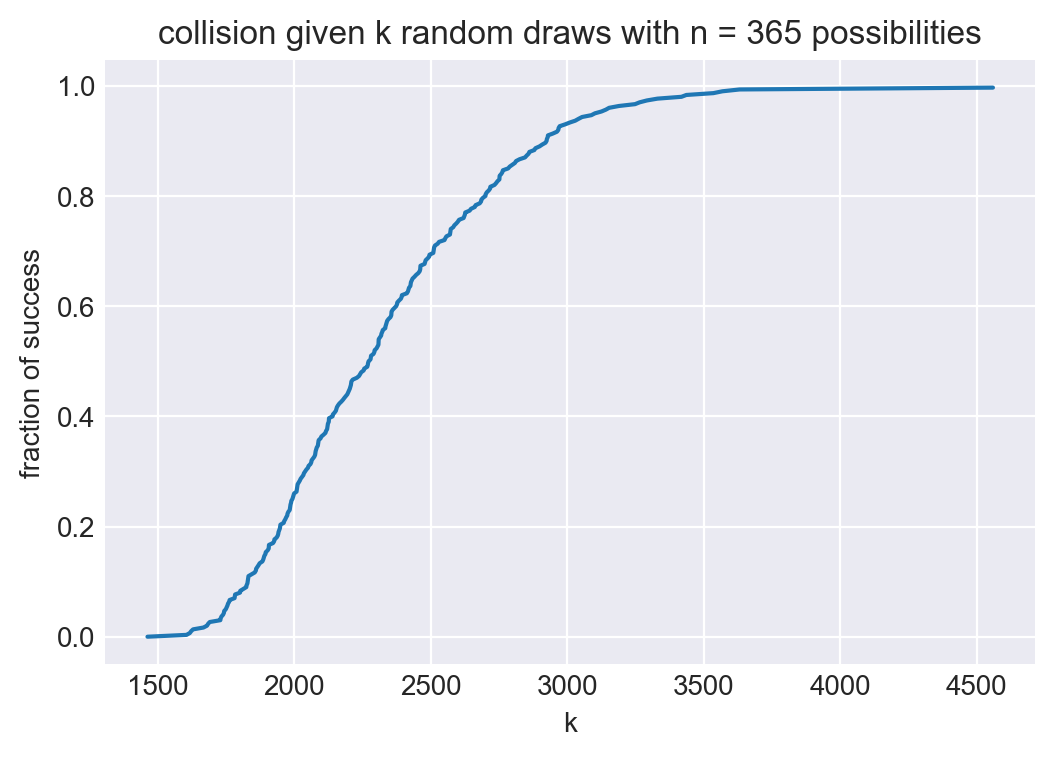

In [25]:
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['figure.dpi'] = 200
plt.title("collision given k random draws with n = %d possibilities" %n)
plt.xlabel("k")
plt.ylabel("fraction of success")
plt.plot(np.array(k), np.array(y))
plt.show()

In [26]:
np.mean(k)

2324.2166666666667

Which should be close to the rough calculation of $K = n(\gamma+\ln{n}) = 365(0.577+\ln{365})$

In [27]:
n*(0.577+math.log(n))

2364.0675340576095

Notice how this solution is much closer to the observed value than the rough Birthday paradox approximation